## Double U-Net training for MICCAI 2016 challenge

Training and evaluation over the [MICCAI dataset](http://miccai2016.org/) of the Double U-Net model created with PyEDDL library.

**Francisco Javier Blázquez Martínez** \
**francisco.blazquezmartinez@epfl.ch**

Double degree in Mathematics-Computer Engineering

Complutense University of Madrid, Spain \
École Politechnique Fédérale de Lausanne, Switzerland

DeepHealth project

In [1]:
import pyeddl.eddl as eddl
from pyeddl.tensor import Tensor

In [2]:
# Set the following variable to the folder containing the MICCAI dataset
MICCAI_PATH = "/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/miccai2016/"

#### MICCAI data extraction

In [ ]:
# TODO: It's required to extract all flair images and all masks (in .nii.gz) 

#### MICCAI data visualization

In [6]:
import numpy   as np
import nibabel as nib
import matplotlib.pyplot as plt
import random

In [7]:
imgs_path = [MICCAI_PATH + 'preprocessed/s'+str(i)+'/FLAIR_preprocessed.nii' for i in range(1,16)]
masks_path= [MICCAI_PATH + 'unprocessed/s'+str(i)+'/Consensus.nii'           for i in range(1,16)]

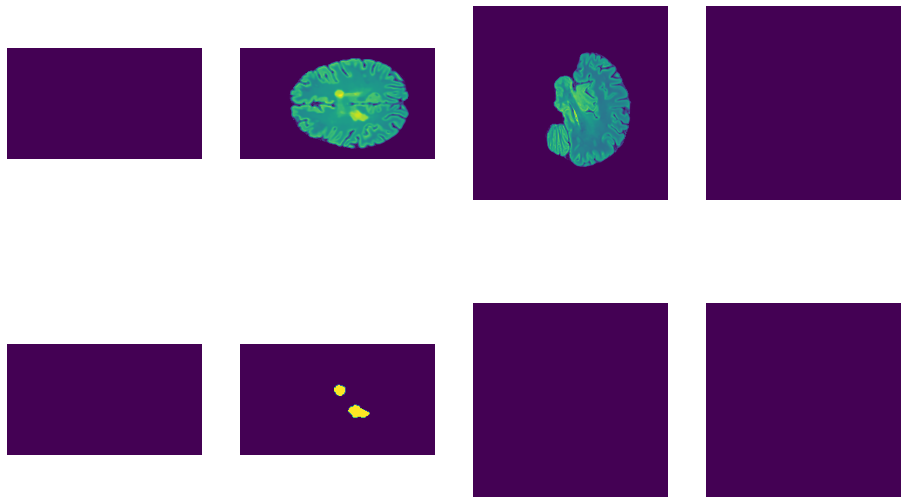

In [8]:
fig = plt.figure(figsize=(16, 10))
rows = 2
columns = 4

for i in range(columns):
    idx = random.randint(0, len(imgs_path)-1)
    
    img_np = nib.load(imgs_path[idx] ).get_fdata()
    msk_np = nib.load(masks_path[idx]).get_fdata()
    
    j = random.randint(0, 2)
    k = random.randint(0, img_np.shape[j])
    
    img_2d_np = img_np[:,:,0]
    msk_2d_np = msk_np[:,:,0]
    
    if j == 0:
        img_2d_np = img_np[k,:,:]
        msk_2d_np = msk_np[k,:,:]
    elif j == 1:
        img_2d_np = img_np[:,k,:]
        msk_2d_np = msk_np[:,k,:]
    else:
        img_2d_np = img_np[:,:,k]
        msk_2d_np = msk_np[:,:,k]    
    
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img_2d_np)
    plt.axis('off')
    
    fig.add_subplot(rows, columns, i+1+columns)
    plt.imshow(msk_2d_np) # set cmap="gray" to display the image in B&W
    plt.axis('off')

#### MICCAI Data Augmentation

In [ ]:
# TODO

#### MICCAI Images resizing

In [ ]:
# WARNING! Run only once, new tensor files (.bin) are created in the dataset folder

In [ ]:
import numpy   as np
import nibabel as nib
import matplotlib.pyplot as plt
import skimage.transform as skTrans

In [ ]:
test_imgs_idx  = [4,9,14]

train_imgs_path = [MICCAI_PATH + 'preprocessed/s'+str(i)+'/FLAIR_preprocessed.nii' for i in range(1,16) if i not in test_imgs_idx]
train_masks_path= [MICCAI_PATH + 'unprocessed/s'+str(i)+'/Consensus.nii'           for i in range(1,16) if i not in test_imgs_idx]

test_imgs_path  = [MICCAI_PATH + 'preprocessed/s'+str(i)+'/FLAIR_preprocessed.nii' for i in test_imgs_idx]
test_masks_path = [MICCAI_PATH + 'unprocessed/s'+str(i)+'/Consensus.nii'           for i in test_imgs_idx]

In [ ]:
im = nib.load(train_imgs_path[0]).get_fdata()
im_resized = skTrans.resize(im, (256,256,256), order=1, preserve_range=True)

In [ ]:
plt.imshow(im_resized[:,:,150], cmap="gray")

#### MICCAI Tensors creation

In [3]:
import numpy   as np
import nibabel as nib
import matplotlib.pyplot as plt
import skimage.transform as skTrans

In [4]:
test_imgs_idx  = [2,10,13]

train_imgs_path = [MICCAI_PATH + 'preprocessed/s'+str(i+1)+'/FLAIR_preprocessed.nii' for i in range(15) if i not in test_imgs_idx]
train_masks_path= [MICCAI_PATH + 'unprocessed/s'+str(i+1)+'/Consensus.nii'           for i in range(15) if i not in test_imgs_idx]

test_imgs_path  = [MICCAI_PATH + 'preprocessed/s'+str(i+1)+'/FLAIR_preprocessed.nii' for i in test_imgs_idx]
test_masks_path = [MICCAI_PATH + 'unprocessed/s'+str(i+1)+'/Consensus.nii'           for i in test_imgs_idx]

In [ ]:
train_x = []
train_y = []

for (img,msk) in zip(train_imgs_path, train_masks_path):
    img_np = nib.load(img).get_fdata()
    msk_np = nib.load(msk).get_fdata()
    
    # First we resize the image
    img_np = skTrans.resize(img_np, (256,256,256), order=1, preserve_range=True)
    msk_np = skTrans.resize(msk_np, (256,256,256), order=1, preserve_range=True)
    
    # Then we slice the 3D image to several 2D images
    for i in range(256):
        train_x.append(img_np[:,:,i])
        train_y.append(msk_np[:,:,i])
        #train_x.append(img_np[:,i,:])
        #train_y.append(msk_np[:,i,:])
        #train_x.append(img_np[i,:,:])
        #train_y.append(msk_np[i,:,:])
    
tensor_x = Tensor.fromarray(train_x)
tensor_y = Tensor.fromarray(train_y)

tensor_x.save("miccai_trX.bin", "bin")
tensor_y.save("miccai_trY.bin", "bin")

In [5]:
test_x = []
test_y = []

for (img,msk) in zip(test_imgs_path, test_masks_path):
    img_np = nib.load(img).get_fdata()
    msk_np = nib.load(msk).get_fdata()
    
    # First we resize the image
    img_np = skTrans.resize(img_np, (256,256,256), order=1, preserve_range=True)
    msk_np = skTrans.resize(msk_np, (256,256,256), order=1, preserve_range=True)
    
    # Then we slice the 3D image to several 2D images
    for i in range(256):
        test_x.append(img_np[:,:,i])
        test_y.append(msk_np[:,:,i])
        #test_x.append(img_np[:,i,:])
        #test_y.append(msk_np[:,i,:])
        #test_x.append(img_np[i,:,:])
        #test_y.append(msk_np[i,:,:])
    
tensor_x = Tensor.fromarray(test_x)
tensor_y = Tensor.fromarray(test_y)

tensor_x.save("miccai_tsX.bin", "bin")
tensor_y.save("miccai_tsY.bin", "bin")

In [6]:
tensor_x.shape

[768, 256, 256]

#### MICCAI preprocessed data visualization

In [3]:
import numpy   as np
import matplotlib.pyplot as plt
import random

In [9]:
tr_x = Tensor.load(MICCAI_PATH + "bin/miccai_trX_oriented.bin")
tr_y = Tensor.load(MICCAI_PATH + "bin/miccai_trY_oriented.bin")

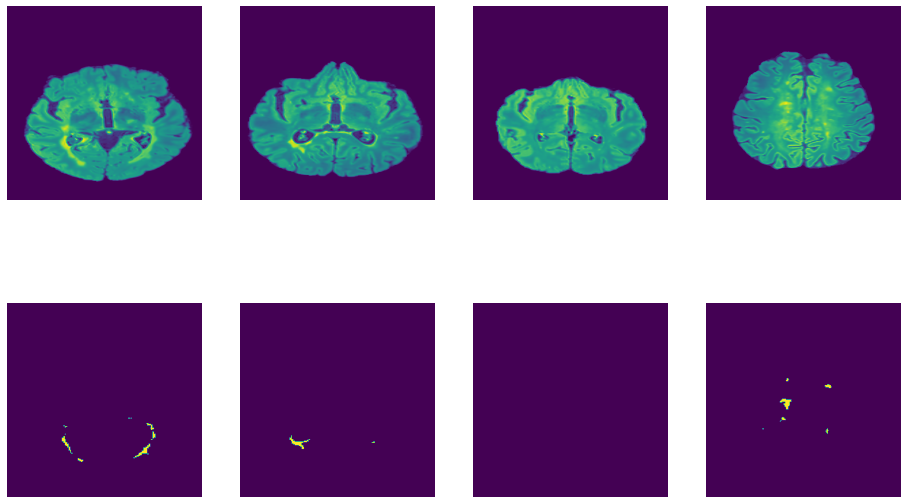

In [10]:
fig = plt.figure(figsize=(16, 10))
rows = 2
columns = 4

for i in range(columns):
    idx = [150, 400, 670, 3000]
    
    img_np = tr_x.select([str(idx[i])])
    msk_np = tr_y.select([str(idx[i])])
    
    # Remove batches axis (and number of channels for the mask)
    img_np.reshape_(img_np.shape[1:])
    msk_np.reshape_(msk_np.shape[1:])
    
    # Prepare to Matplotlib visualization
    img_np = img_np.getdata().astype(np.int32).T
    msk_np = msk_np.getdata().astype(np.int32).T

    # Size check
    #print(img_np.shape)
    #print(msk_np.shape)

    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img_np) # set cmap="gray" to display the image in B&W
    plt.axis('off')
    
    fig.add_subplot(rows, columns, i+1+columns)
    plt.imshow(msk_np) # set cmap="gray" to display the image in B&W
    plt.axis('off')

In [14]:
ts_x = Tensor.load(MICCAI_PATH + "bin/miccai_tsX_oriented.bin")
ts_y = Tensor.load(MICCAI_PATH + "bin/miccai_tsY_oriented.bin")

[468, 320, 661, 490]


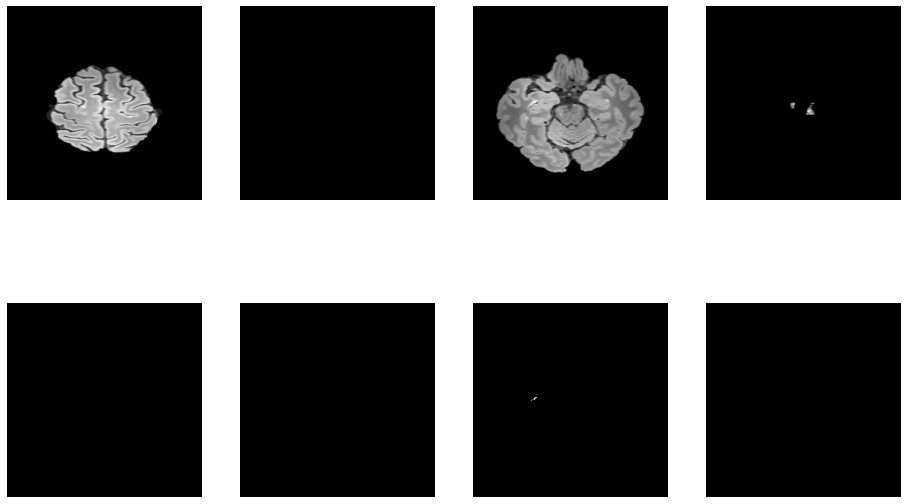

In [41]:
fig = plt.figure(figsize=(16, 10))
rows = 2
columns = 4

#idx = [1191, 1266, 1273, 1975] 
#idx = [415, 1634, 1252, 1266]

idx = [random.randint(0, 767) for _ in range(columns)]
print(idx)

for i in range(columns):
    img_np = ts_x.select([str(idx[i])])
    msk_np = ts_y.select([str(idx[i])])
    
    # Remove batches axis (and number of channels for the mask)
    img_np.reshape_(img_np.shape[1:])
    msk_np.reshape_(msk_np.shape[1:])
    
    # Prepare to Matplotlib visualization
    img_np = img_np.getdata().astype(np.int32).T
    msk_np = msk_np.getdata().astype(np.int32).T

    # Size check
    #print(img_np.shape)
    #print(msk_np.shape)

    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img_np, cmap="gray") # set cmap="gray" to display the image in B&W
    plt.axis('off')
    
    fig.add_subplot(rows, columns, i+1+columns)
    plt.imshow(msk_np, cmap="gray") # set cmap="gray" to display the image in B&W
    plt.axis('off')

In [20]:
# Candidates:
# 2070
# 1236
# 1248
# 1994
# 2011
# 1999
# 2023
# 2154
# 1942
# 2047
# 2064
# 1985

In [ ]:
# To be used:
# 1191
# 1266
# 1273
# 1975
# 1252

# 415
# 1634

#### Save images and masks

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy   as np

In [4]:
ts_x = Tensor.load(MICCAI_PATH + "bin/miccai_tsX_preprocessed.bin")
ts_y = Tensor.load(MICCAI_PATH + "bin/miccai_tsY_preprocessed.bin")

In [5]:
i = 1985

In [6]:
img_tensor = ts_x.select([str(i)])
msk_tensor = ts_y.select([str(i)])

In [7]:
msk_tensor.mult_(255)

In [8]:
img_tensor.reshape_(img_tensor.shape[1:])
msk_tensor.reshape_(msk_tensor.shape[1:])

In [9]:
img_tensor.save("aux_img.jpg")
msk_tensor.save("aux_msk.jpg")

In [10]:
img_tensor.save("auxr_img.png")
msk_tensor.save("auxr_msk.png")

In [11]:
img_np = img_tensor.getdata()[0]
msk_np = msk_tensor.getdata()[0]

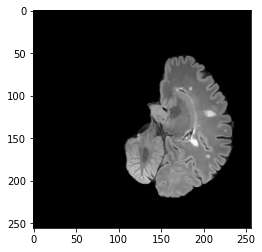

In [16]:
plt.imshow(img_np, cmap="gray")
plt.savefig('aux_img_np.jpg')

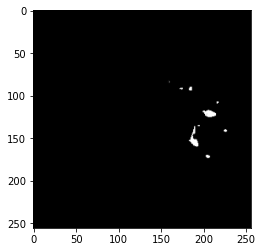

In [15]:
plt.imshow(msk_np, cmap="gray")
plt.savefig('aux_mask_np.png')

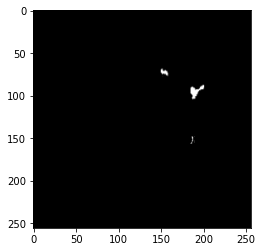

In [23]:
idxs = [415, 1634, 1252, 1266, 1191, 1273, 1975]

for i in idxs:
    img_np = ts_x.select([str(i)])
    msk_np = ts_y.select([str(i)])
    msk_np.mult_(255.0)
    
    # Prepare to Matplotlib visualization
    img_np = img_np.getdata()[0]
    msk_np = msk_np.getdata()[0]
    
    plt.imshow(img_np, cmap="gray")
    plt.savefig('ts'+str(i)+'_img.jpg')
    plt.imshow(msk_np, cmap="gray")
    plt.savefig('ts'+str(i)+'_msk.jpg')

#### U-Net model train

In [ ]:
# WARNING! Heavy computation, run preferably on the server!

In [ ]:
from unet import unet

In [ ]:
EPOCHS        = 10
BATCH_SIZE    = 8
NUM_BATCHES   = 50
GPU           = True
MEM           = "full_mem"
LOSS_FUNCTION = "mse"
METRICS       = "mse"
LEARNING_RATE = 0.00001

In [ ]:
in_ = eddl.Input([1, 256, 256])
net = unet(in_)

# TODO: Should we return the model created or the output layer?
#out = unet(in_) 
#net = eddl.Model([in_], [out])

eddl.build(
    net,
    eddl.adam(LEARNING_RATE),  # Optimizer
    [LOSS_FUNCTION],           # Losses
    [METRICS],                 # Metrics
    eddl.CS_GPU(mem=MEM) if GPU else eddl.CS_CPU(mem=MEM)
)

eddl.summary(net)

In [ ]:
x_train = Tensor.load(MICCAI_PATH+"miccai_trX_preprocessed.bin")
x_train.div_(255.0)
x_train.info()

y_train = Tensor.load(MICCAI_PATH+"miccai_trY_preprocessed.bin")
y_train.div_(255.0)
y_train.info()

xbatch = Tensor([BATCH_SIZE, 1, 256, 256])
ybatch = Tensor([BATCH_SIZE, 1, 256, 256])

In [ ]:
for i in range(EPOCHS):
    print("\nEpoch %d/%d" % (i + 1, EPOCHS))
    eddl.reset_loss(net)
    for j in range(NUM_BATCHES):
        eddl.next_batch([x_train, y_train], [xbatch, ybatch])
        eddl.train_batch(net, [xbatch_da], [ybatch_da])
        eddl.print_loss(net, j)

#### U-Net model save

In [ ]:
eddl.save("models/unet_miccai.bin")

#### U-Net model load

In [ ]:
from unet import unet

In [ ]:
GPU           = True
MEM           = "full_mem"
LOSS_FUNCTION = "mse"
METRICS       = "mse"
LEARNING_RATE = 0.00001

In [ ]:
in_ = eddl.Input([1, 256, 256])
net = unet(in_)

# TODO: Should we return the model created or the output layer?
#out = unet(in_) 
#net = eddl.Model([in_], [out])

eddl.build(
    net,
    eddl.adam(LEARNING_RATE),  # Optimizer
    [LOSS_FUNCTION],           # Losses
    [METRICS],                 # Metrics
    eddl.CS_GPU(mem=MEM) if GPU else eddl.CS_CPU(mem=MEM)
)

eddl.summary(net)

In [ ]:
eddl.load(net, "models/unet_miccai.bin")

#### U-Net model visual analysis

In [ ]:
import numpy   as np
import matplotlib.pyplot as plt
import random

In [ ]:
tensor_x = Tensor.load(MICCAI_PATH + "miccai_trX_preprocessed.bin")
tensor_y = Tensor.load(MICCAI_PATH + "miccai_trY_preprocessed.bin")

In [ ]:
fig = plt.figure(figsize=(24, 10))
rows = 3
columns = 6

for i in range(columns):
    idx = random.randint(0, tensor_x.shape[1])
    
    img_np = tensor_x.select([str(i)])
    msk_np = tensor_y.select([str(i)])
    
    # Remove batches axis (and number of channels for the mask)
    img_np.reshape_(img_np.shape[1:])
    msk_np.reshape_(msk_np.shape[2:])
    
    # Prepare to Matplotlib visualization
    img_np = img_np.getdata().astype(np.int32).T
    msk_np = msk_np.getdata().astype(np.int32).T

    # Size check
    #print(img0_np.shape)
    #print(msk0_np.shape)

    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img_np)
    plt.axis('off')
    
    fig.add_subplot(rows, columns, i+1+columns)
    plt.imshow(msk_np) # set cmap="gray" to display the image in B&W
    plt.axis('off')
    
    # TODO: Here we should take the mask that our model gives!
    fig.add_subplot(rows, columns, i+1+columns*2)
    plt.imshow(msk_np) # set cmap="gray" to display the image in B&W
    plt.axis('off')

#### U-Net model evaluation

In [ ]:
# TODO: Keep some images out of the train set for evaluation!

#### Saving images when tensor.save() fails

In [1]:
import numpy   as np
import imageio

In [2]:
MICCAI_PATH = "/home/francisco/Documents/Universidad/5_Carrera/TFG_Computer_Science/miccai2016/"

In [3]:
tsx = np.load(MICCAI_PATH+"npy/miccai2016_tsx.npy")
tsy = np.load(MICCAI_PATH+"npy/miccai2016_tsy.npy")

In [4]:
imageio.imwrite('ts431_input.jpg', tsx[:,:,431])
imageio.imwrite('ts687_input.jpg', tsx[:,:,687])
imageio.imwrite('ts175_input.jpg', tsx[:,:,175])

Lossy conversion from float64 to uint8. Range [0.0, 2704.8683564251523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 2369.7823332362022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 205.6276939845155]. Convert image to uint8 prior to saving to suppress this warning.


In [5]:
imageio.imwrite('ts431_mask.jpg', tsy[:,:,431])
imageio.imwrite('ts687_mask.jpg', tsy[:,:,687])
imageio.imwrite('ts175_mask.jpg', tsy[:,:,175])

Lossy conversion from float64 to uint8. Range [0.0, 1.0000000000000004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1.0000000000000004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [6]:
tr_x = np.load(MICCAI_PATH+"npy/miccai2016_trx.npy")
tr_y = np.load(MICCAI_PATH+"npy/miccai2016_try.npy")

In [8]:
imageio.imwrite('tr1426_mask.jpg', tr_y[:,:,1426])
imageio.imwrite('tr943_mask.jpg', tr_y[:,:,943])
imageio.imwrite('tr175_mask.jpg', tr_y[:,:,175])

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


#### References:
